notebook para hacer el primer modelo de medellín. 

Experimento 1

In [17]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [11]:
os.listdir("../data/Dengue_Dataset(Medellin).csv")

['Dataset Dengue (Espanol).pdf',
 'Dengue Dataset.pdf',
 'Dengue_Dataset(Medellin).csv',
 'dengue_data_all_municipalities.csv',
 'embeddings_medellin_100features.csv',
 'embeddings_medellin_200features.csv',
 'features_resnet50.csv',
 'features_transformer.csv',
 'pca_medellin_100features.csv',
 'pca_medellin_120features(10_per_band).csv']

In [13]:
data_path = os.path.join('..', 'data', 'Dengue_Dataset(Medellin).csv')
data_path

'..\\data\\Dengue_Dataset(Medellin).csv'

In [14]:
data = pd.read_csv(data_path)

In [16]:
data.head()

,cases_medellin,DATA,YEAR,YearWeek,LastDayWeek,MONTH,precipitation_medellin,precipitation_medellin_rural,precipitation_medellin_urbano,temperature
0,1,"['2007', 'w01']",2007,200701,2007-01-06,1,13.096688,14.097693,12.628933,19.615357
1,0,"['2007', 'w02']",2007,200702,2007-01-13,1,8.437044,6.910390,9.067214,22.234000
2,0,"['2007', 'w03']",2007,200703,2007-01-20,1,19.373165,21.616968,18.406665,22.268857
3,0,"['2007', 'w04']",2007,200704,2007-01-27,1,0.000000,0.000000,0.000000,23.546000
4,0,"['2007', 'w05']",2007,200705,2007-02-03,2,3.725206,3.144225,3.901021,25.353071


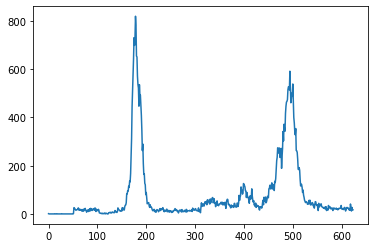

In [19]:
plt.plot(data["cases_medellin"])

# Regresión lineal